In [1]:
from PIL import Image
import numpy as np 
from matplotlib import pyplot as plt
import cv2

In [2]:
input_path = "assets/sample-cvat-output/cereals_20210921T132014000Z.jpe"
mask_path = "assets/sample-cvat-output/mask_cereals_20210921T132014000Z.png"

In [3]:
def get_overlay(image, colored_mask):
    overlay = cv2.addWeighted(image, 0.5, colored_mask, 0.65, 0)
    return overlay
    

def display_images(nrow, ncol, image_names, image_arrays, fig_name, fig_size=(32, 16), ):

    fig, axs = plt.subplots(nrow, ncol, figsize=fig_size, constrained_layout=True)
    axs = axs.flatten()
    
    for count, ax in enumerate(axs):
        ax.imshow(image_arrays[count])
        ax.set_title(image_names[count])
        ax.grid(False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])

    fig.savefig(fig_name)

## Display RGB Mask

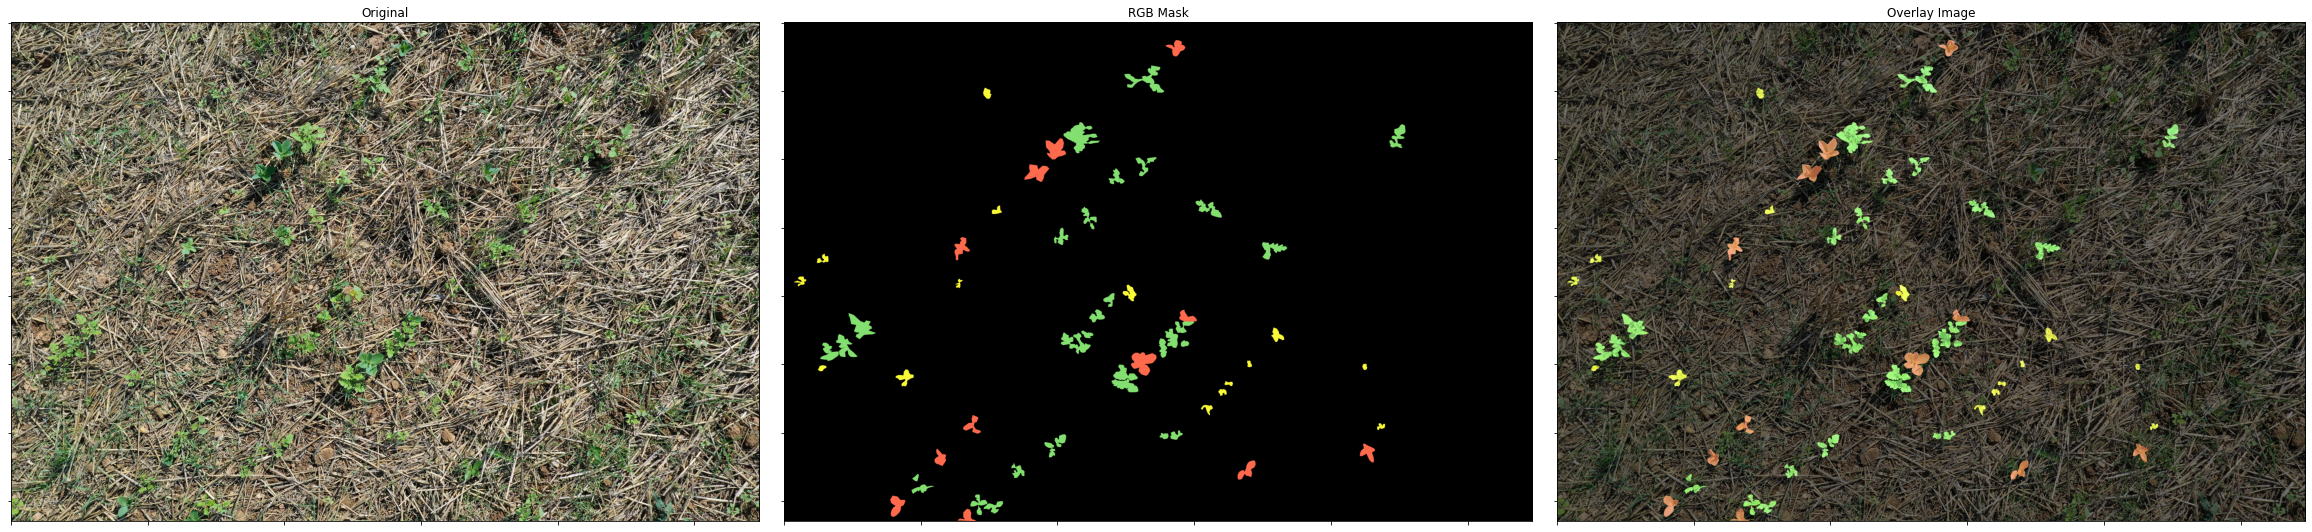

In [4]:
image_names = ['Original', 'RGB Mask', 'Overlay Image']

img_orig = Image.open(input_path);img_orig = np.asarray(img_orig)
output_image = Image.open(mask_path);out_array = np.asarray(output_image)
overlay = get_overlay(image=img_orig, colored_mask=out_array)
image_arrays = [img_orig, output_image, overlay]

display_images(nrow=1, ncol=3, image_names=image_names, image_arrays=image_arrays, fig_name='RGB-Mask-Viz.png')

## Display Binary Mask of Each Class

In [7]:
rgb_mask = cv2.imread(mask_path)
rgb_mask = cv2.cvtColor(rgb_mask, cv2.COLOR_BGR2RGB)
crop_mask = rgb_mask[:, :] == [131,224,112] # green
weed_mask = rgb_mask[:, :] == [255,106,77] # red
unhealthy_mask = rgb_mask[:, :] == [250,250,55] # yellow

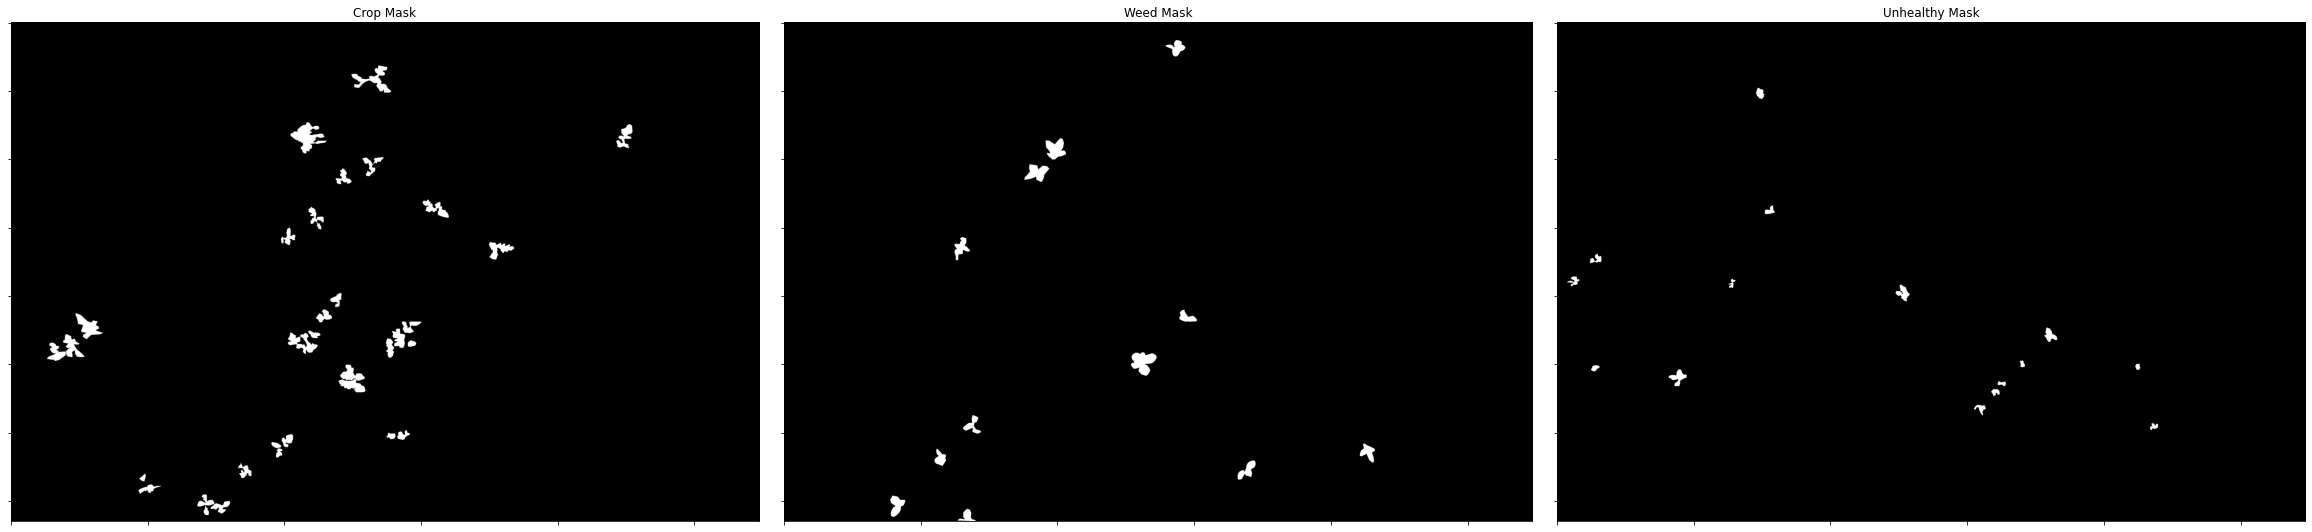

In [8]:
masks = [crop_mask*255, weed_mask*255, unhealthy_mask*255]
names = ['Crop Mask', 'Weed Mask', 'Unhealthy Mask']
display_images(nrow=1, ncol=3, image_names=names, image_arrays=masks, fig_name='Extracting-Specific-Mask.png')